In [1]:
from repsig.offline import frac_repetitions, geo_budget, zeta_budget
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from functools import partial

In [2]:
plt.style.use('ggplot')

In [3]:
def z_scores_for_plot(n, budget_fn, u=0.1, alpha=0.05, plot_res=1000):
    budgets = budget_fn(n)
    reps = frac_repetitions(n, u)
    decision_points = np.floor(np.linspace(1, n, min(plot_res, 1 + n))).astype(np.int32)

    reps = reps[decision_points - 1]
    budgets = budgets[decision_points - 1]
    p_values = alpha * reps * budgets
    z_scores = stats.norm.ppf(1 - p_values / 2)
    return decision_points, z_scores

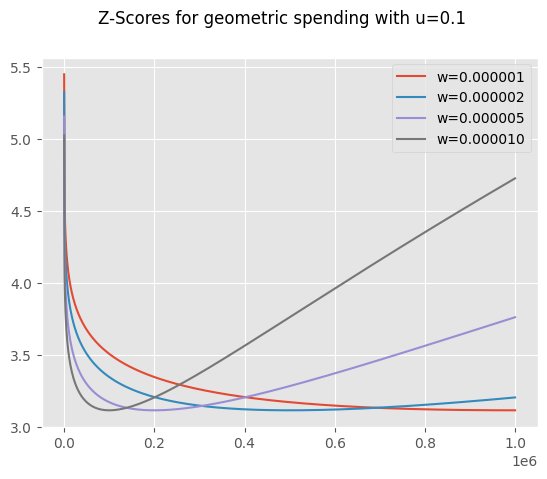

In [4]:
n = 1000000
for w in [1e-6, 2e-6, 5e-6, 1e-5]:
    plt.plot(*z_scores_for_plot(n, partial(geo_budget, w=w)), label=f'w={w:.6f}')
plt.legend()
plt.suptitle('Z-Scores for geometric spending with u=0.1')
plt.show()

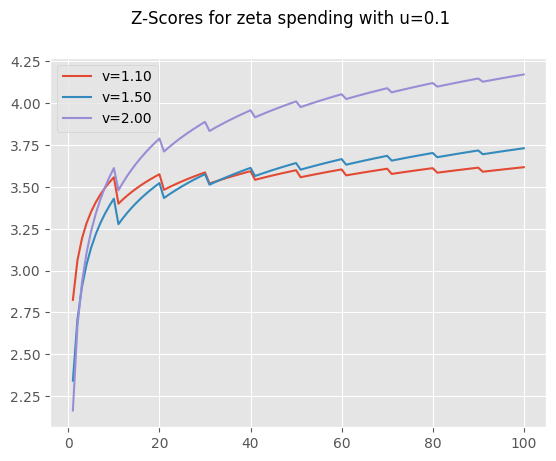

In [5]:
n = 100
for v in [1.1, 1.5, 2]:
    plt.plot(*z_scores_for_plot(n, partial(zeta_budget, v=v, s=0)), label=f'v={v:.2f}')
plt.legend()
plt.suptitle('Z-Scores for zeta spending with u=0.1')
plt.show()

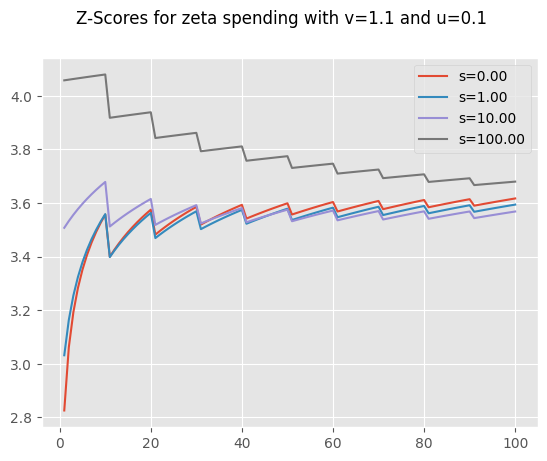

In [6]:
n = 100
for s in [0, 1, 10, 100]:
    plt.plot(*z_scores_for_plot(n, partial(zeta_budget, v=1.1, s=s)), label=f's={s:.2f}')
plt.legend()
plt.suptitle('Z-Scores for zeta spending with v=1.1 and u=0.1')
plt.show()